In [9]:
import os
import random
from typing import List
import torch
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image
from torchvision.datasets import ImageFolder

root_dir = r'C:\Users\rauls\OneDrive\Documentos\2-Facul-Programming\CarClassifier'

In [10]:
cars_model = torch.load(os.path.join(root_dir, 'src/best_cars_model.pth'))
classes = ImageFolder(os.path.join(root_dir, 'src/data/cars_train/train')).classes

random.sample(classes, 5)

['Dodge Caravan Minivan 1997',
 'Hyundai Elantra Touring Hatchback 2012',
 'Audi RS 4 Convertible 2008',
 'Jeep Patriot SUV 2012',
 'GMC Canyon Extended Cab 2012']

In [11]:
mean = [0.4708, 0.4602, 0.4550]
std = [0.2593, 0.2584, 0.2634]

cars_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [12]:
def classify(model: torch.nn.Module, image_transforms: transforms.Compose, image_paths: str, classes: List[str]):
    model = model.eval()

    if isinstance(image_paths, str):
        image_paths = [image_paths]

    images = {image_path: Image.open(image_path) for image_path in image_paths}

    num_images = len(images)
    cols = min(3, num_images)  # Limit to at most 3 columns
    rows = (num_images + cols - 1) // cols  # Calculate required rows

    _, axes = plt.subplots(rows, cols)

    for i, (image_path, image) in enumerate(images.items()):
        image_transformed = image_transforms(image).float()
        image_transformed = image_transformed.unsqueeze(0)

        output = model(image_transformed)
        _, predicted = torch.max(output.data, 1)

        predicted_class = classes[predicted.item()]
        print(f"{image_path}: {predicted_class}")

        if num_images == 1:
            axes.imshow(image)  # Use flattened axes for efficient indexing
            axes.set_title(predicted_class)
            axes.axis('off')
        else:
            axes.flat[i].imshow(image)  # Use flattened axes for efficient indexing
            axes.flat[i].set_title(predicted_class)
            axes.flat[i].axis('off')

    plt.tight_layout()
    plt.show()

In [13]:
# Get a random image path from the cars_test directory
cars_test_dir = os.path.join(root_dir, 'src/data/cars_test')
image_dirs = os.listdir(cars_test_dir)
image_paths = [os.path.join(cars_test_dir, dir) for dir in random.sample(image_dirs, 6)]

C:\Users\rauls\OneDrive\Documentos\2-Facul-Programming\CarClassifier\src/data/cars_test\04899.jpg: McLaren MP4-12C Coupe 2012
C:\Users\rauls\OneDrive\Documentos\2-Facul-Programming\CarClassifier\src/data/cars_test\06494.jpg: HUMMER H2 SUT Crew Cab 2009
C:\Users\rauls\OneDrive\Documentos\2-Facul-Programming\CarClassifier\src/data/cars_test\04478.jpg: Hyundai Veloster Hatchback 2012
C:\Users\rauls\OneDrive\Documentos\2-Facul-Programming\CarClassifier\src/data/cars_test\05990.jpg: Acura ZDX Hatchback 2012
C:\Users\rauls\OneDrive\Documentos\2-Facul-Programming\CarClassifier\src/data/cars_test\07111.jpg: Volkswagen Golf Hatchback 1991
C:\Users\rauls\OneDrive\Documentos\2-Facul-Programming\CarClassifier\src/data/cars_test\00550.jpg: Ford Fiesta Sedan 2012


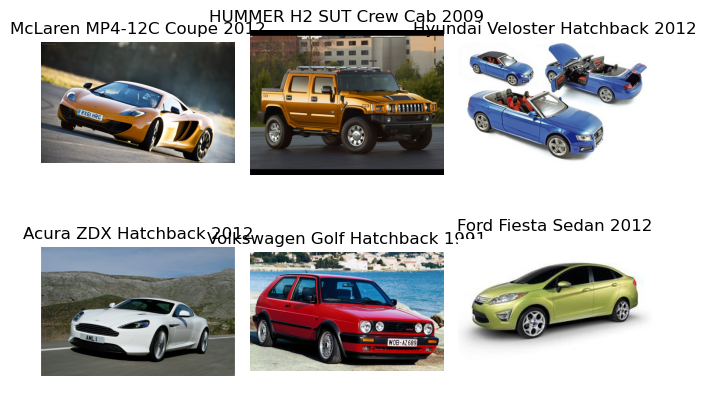

In [14]:
classify(cars_model, cars_transforms, image_paths, classes)